###  Grip @The Sparks Foundation

###  Coder : Deepali Aggarwal(Data Science and Business Analytics Intern) 

### Task 1 : Prediction using Supervised Machine Learning

### (Level - Beginner)

#### Problem Statement 
Predict the percentage of an student based on the no of study hours.

In [19]:
# Importing all the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics

In [6]:
#Reading from the csv file

dataframe = pd.read_csv("student_scores.csv")
dataframe

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


### Exploratory Data Analysis

In [27]:
#using describe to analyse the numerical features

dataframe.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


<AxesSubplot:>

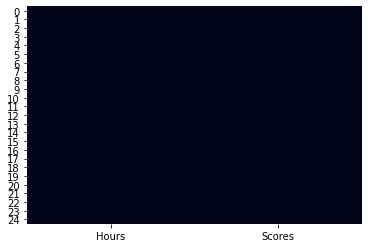

In [7]:
#check for null values by plotting heatmap

sns.heatmap(dataframe.isnull() , yticklabels = True , cbar = False)

Text(0, 0.5, 'Percentage Scored')

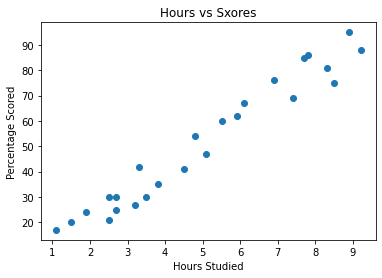

In [8]:
#Plotting the distribution of scores

plt.scatter(dataframe['Hours'], dataframe['Scores'])
plt.title("Hours vs Sxores")
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored')

#### From the graph it is clear that there is positive co-relation between the no of hours studied versus the percentage scored

<AxesSubplot:>

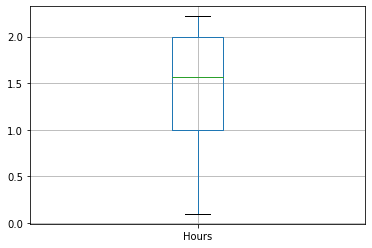

In [9]:
# Finding the outliers in dataset using Boxplot

data = dataframe.copy()
data['Hours']=np.log(data['Hours'])
data.boxplot(column='Hours')

#### From the plot it is clear that the given feature has no outliers.

<AxesSubplot:>

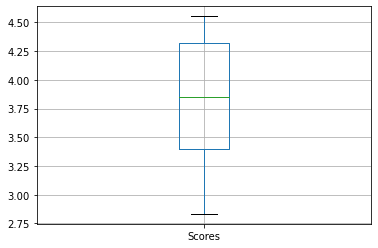

In [10]:
data['Scores']=np.log(data['Scores'])
data.boxplot(column='Scores')

### Preparing the data for training

In [11]:
#This step will divide the dependent and independent features for training

X= dataframe.iloc[:, :-1].values
Y = dataframe.iloc[:, 1].values

In [12]:
# This step will split the dependent and independent feature in two sets for training and testing purpose. 

train_x, test_x,  train_y,test_y = train_test_split(X, Y, test_size = 0.2)

In [13]:
#Intializing the Linear Regression model

model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression()

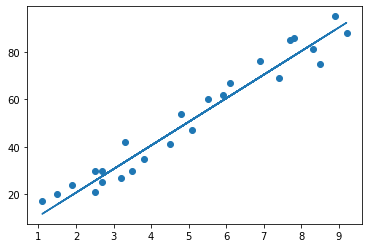

In [14]:
#Plotting the regression line

line = model.coef_ * X + model.intercept_
plt.scatter(X, Y)
plt.plot(X, line)
plt.show()

In [15]:
#Predicting the values for test data

y_pred = model.predict(test_x)
pd.DataFrame({'Predicted Value' : y_pred,  'Actual Value' : test_y})

,Predicted Value,Actual Value
0,48.528569,54
1,11.735831,17
2,33.612594,42
3,38.584585,35
4,61.455747,67


In [26]:
#Testing the model with own data

hours = np.array([[8]])
pred_percent = model.predict(hours)
print("No of hours: {}".format(hours))
print("Percentage expected : {}".format(pred_percent[0]))

No of hours: [[8]]
Percentage expected : 80.34931475314231


### Analyzing the Model Accuracy

In [20]:
#This is final step to analyze the model accuracy by choosing a good metrics. For Regression problems the metrics are r2_score, 
# mean_squared_error, mean_absolute_error, etc.

metrics.mean_absolute_error(test_y, y_pred)

5.650369097131633

In [21]:
metrics.mean_squared_error(test_y, y_pred)

34.31692372771585

In [22]:
r2_score(y_pred, test_y)

0.8745131490726498